## Data cleaning 

The purpose of this notebook is to clean the data raw data 
- Remove the missing and duplicate values 
- Remove data leakage 
- Remove the feature having more the 30% of the missing values 
- Only keep the application time data 

this gives  us  a clean  insight  about the data and helps in better modeling  

In [1]:
## imports libs and packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
DATA_PATH = "../../data/raw/accepted_2007_to_2018Q4.csv"
df = pd.read_csv(DATA_PATH, low_memory=False)

In [3]:
# 1. Filter valid outcomes
df = df[df["loan_status"].isin(["Fully Paid", "Charged Off"])]

# 2. Create target
df["target"] = (df["loan_status"] == "Charged Off").astype(int)

# 3. Drop rows with missing target
df = df.dropna(subset=["target"])


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df["target"].shape

(1345310,)

In [6]:
df.shape

(1345310, 152)

### Drop missing and duplicate features have more than 30% missing data

In [7]:
df_missing = df.isnull().mean().sort_values(ascending=False)

In [8]:
df_missing.head(10)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_amount                               0.995723
hardship_last_payment_amount                  0.995723
hardship_length                               0.995723
hardship_status                               0.995723
hardship_reason                               0.995723
deferral_term                                 0.995723
hardship_start_date                           0.995723
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

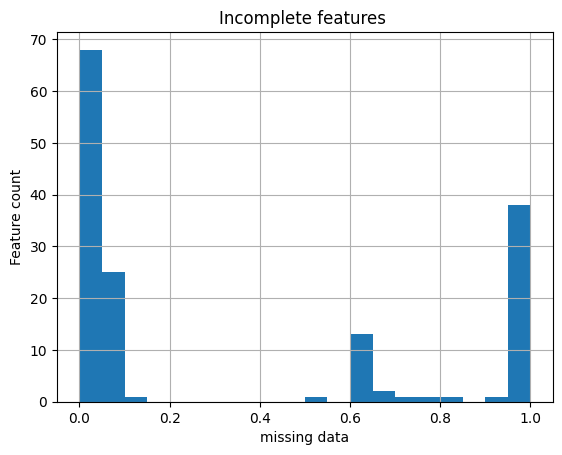

In [9]:
plt.Figure(figsize=(8,6),dpi=90)
df_missing.plot.hist(bins=20 , grid = True)
plt.title("Incomplete features ")
plt.xlabel("missing data")  
plt.ylabel("Feature count")
plt.show        

From the above histogram, we see there's a large gap between features missing "some" data (<20%) and those missing "lots" of data (>40%). Because it's generally very difficult to accurately impute data with more than 30% missing values, we drop such columns. First store all variables missing more than 30% data in an alphabetical list:

In [10]:
drop_list = sorted(list(df_missing[df_missing > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [11]:
len(drop_list)

58

In [12]:
df.drop(labels=drop_list,axis=1,inplace=True)

In [13]:
df.shape

(1345310, 94)

In [14]:
s =  df.duplicated().sum()
print(s)

0


In [15]:
df.shape

(1345310, 94)

In [16]:
print(sorted(df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.

In [17]:
keep_list = ['addr_state',"target", 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', "loan_status", 'fico_range_high', 'fico_range_low',  'home_ownership',  'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [18]:
print(len(keep_list))

29


In [19]:
drop_list = [col for col in df.columns if col not in keep_list]
print(drop_list)

['id', 'funded_amnt', 'funded_amnt_inv', 'grade', 'emp_title', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', '

### Drop these features 

In [20]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [21]:
df.shape

(1345310, 29)

In [22]:
pd.set_option('display.max_columns', None)
df.head(5)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,target
0,3600.0,36 months,13.99,123.03,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-2003,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0,0
1,24700.0,36 months,11.99,820.28,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,577xx,SD,16.06,Dec-1999,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,0
2,20000.0,60 months,10.78,432.66,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,605xx,IL,10.78,Aug-2000,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0,0
4,10400.0,60 months,22.45,289.91,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,Jun-1998,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0,0
5,11950.0,36 months,13.44,405.18,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.20,Oct-1987,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0,0


In [23]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16660
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
fico_range_low              0
fico_range_high             0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
target                      0
dtype: int64

### Checking each missing value coloumn individually

#### emp_length

In [24]:
df["emp_length"].head(5)

0    10+ years
1    10+ years
2    10+ years
4      3 years
5      4 years
Name: emp_length, dtype: object

In [25]:
df['emp_length'].value_counts(dropna=False).sort_index(ascending=False)

emp_length
< 1 year     108061
9 years       50937
8 years       60701
7 years       59624
6 years       62733
5 years       84154
4 years       80556
3 years      107597
2 years      121743
10+ years    442199
1 year        88494
NaN           78511
Name: count, dtype: int64

this is a categorical dtype. Also it is an important feature.  
So, first conver this into int and then impute with meadian 


In [26]:
## so we def a function  which converts its value 
def convert_emp_length(val):
    if pd.isna(val):
        return np.nan
    if val == "< 1 year":
        return 0
    if val == "10+ years":
        return 10
    return int(val.split()[0])

In [27]:
df["emp_length_num"] = df["emp_length"].apply(convert_emp_length)


In [28]:
df["emp_length_num"].value_counts(dropna=False).sort_index()

emp_length_num
0.0     108061
1.0      88494
2.0     121743
3.0     107597
4.0      80556
5.0      84154
6.0      62733
7.0      59624
8.0      60701
9.0      50937
10.0    442199
NaN      78511
Name: count, dtype: int64

In [29]:
df["emp_length_missing"] = df["emp_length_num"].isna().astype(int)
df["emp_length_num"] = df["emp_length_num"].fillna(df["emp_length_num"].median())


In [30]:
df[["emp_length", "emp_length_num", "emp_length_missing"]].head(10)


,emp_length,emp_length_num,emp_length_missing
0,10+ years,10.0,0
1,10+ years,10.0,0
2,10+ years,10.0,0
4,3 years,3.0,0
5,4 years,4.0,0
6,10+ years,10.0,0
7,10+ years,10.0,0
8,6 years,6.0,0
9,10+ years,10.0,0
12,3 years,3.0,0


In [31]:
df = df.drop(columns=["title"])


In [32]:
df = df.dropna(subset=["zip_code"])


In [33]:
df["dti"] = df["dti"].fillna(df["dti"].median())


In [34]:
df["revol_util_missing"] = df["revol_util"].isna().astype(int)
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())


In [35]:
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(0)


In [36]:
df["mort_acc_missing"] = df["mort_acc"].isna().astype(int)
df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].median())


In [37]:
df = df.drop(columns="emp_length" , axis=1)

In [38]:
df.isnull().sum().sort_values(ascending=False)


loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
target                  0
emp_length_num          0
emp_length_missing      0
revol_util_missing      0
mort_acc_missing        0
dtype: int64

In [39]:
df.shape

(1345309, 31)

In [41]:
df.to_parquet("../../data/processed/cleaned_data.parquet")
